# 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore', category=FutureWarning)
path = '../input/child-mind-institute-problematic-internet-use/'

# Load the training data
train = pd.read_csv(path+'train.csv')
train.head(5)

#don's consider physical data like Physical Measures, FitnessGram Vitals and Treadmill, FitnessGram Child, Bio-electric Impedance Analysis, 

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f"Train shape: {train.shape}")

Train shape: (3960, 82)


In [3]:
# Load the data dictionary data
data_dictionary = pd.read_csv(path+'data_dictionary.csv')
data_dictionary.head(5)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [4]:
# Load the test data
test = pd.read_csv(path+'test.csv')
test.head(5)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some features that are related to the target variable and are not present in the test set. They can act as labels too, either predict them or either predict the output directly

In [5]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
data_dictionary[data_dictionary['Field'].isin(columns_not_in_test)]

,Instrument,Field,Description,Type,Values,Value Labels
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household ch...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationshi...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer becaus...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-m...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or ...,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=..."


The test dataset doesn't have any PCIAT columns (which is obvious too, since they are used to directly calculate the PII).

Insight:

We should focus on predicting the target from all other features except the PCIAT results.
We know the target only for two thirds of the samples. The samples without target can perhaps be used for semi-supervised learning.
We can directly predict sii (this is the value we have to submit), or we can predict PCIAT-PCIAT_Total and then transform this prediction to a sii prediction for submission. As PCIAT-PCIAT_Total is more granular and informative than sii, training to predict PCIAT-PCIAT_Total has the potential to produce a better model.

Some SII is calculated even when some of PCIAT score is null, this will cause data inconsistency, so let's remove that

In [6]:
train['sii'].unique()

array([ 2.,  0.,  1., nan,  3.])

In [7]:
# Step 1: Define the list of PCIAT columns
pciat_columns = [
    'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 
    'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 
    'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 
    'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 
    'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 
    'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'
]

# Step 2: Check for missing values (NaN) in the PCIAT columns
missing_pciat_values = train[pciat_columns].isnull().sum()

# Step 3: Display how many PCIAT columns have missing values
print("Missing values in PCIAT columns:")
print(missing_pciat_values[missing_pciat_values > 0])


Missing values in PCIAT columns:
PCIAT-Season         1224
PCIAT-PCIAT_01       1227
PCIAT-PCIAT_02       1226
PCIAT-PCIAT_03       1229
PCIAT-PCIAT_04       1229
PCIAT-PCIAT_05       1231
PCIAT-PCIAT_06       1228
PCIAT-PCIAT_07       1231
PCIAT-PCIAT_08       1230
PCIAT-PCIAT_09       1230
PCIAT-PCIAT_10       1227
PCIAT-PCIAT_11       1226
PCIAT-PCIAT_12       1229
PCIAT-PCIAT_13       1231
PCIAT-PCIAT_14       1228
PCIAT-PCIAT_15       1230
PCIAT-PCIAT_16       1232
PCIAT-PCIAT_17       1235
PCIAT-PCIAT_18       1232
PCIAT-PCIAT_19       1230
PCIAT-PCIAT_20       1227
PCIAT-PCIAT_Total    1224
dtype: int64


In [8]:
import pandas as pd

# Assuming the dataset is called 'train' and the PCIAT columns are in the following format
pciat_columns = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)]

# Step 1: Count missing values for each row in PCIAT columns
missing_pciat_count = train[pciat_columns].isna().sum(axis=1)
missing_pciat_count



0        0
1        0
2        0
3        0
4       20
        ..
3955     0
3956    20
3957     0
3958     0
3959    20
Length: 3960, dtype: int64

In [9]:
# Step 2: Define the threshold for keeping rows (5 or fewer missing PCIAT columns)
threshold = 5

# Step 3: Filter the train DataFrame to keep only rows where the number of missing PCIAT columns is <= 5
train = train[missing_pciat_count.loc[train.index] <= threshold]

# Step 4: Display the shape of the updated dataset
print(f"Updated dataset shape: {train.shape}")

Updated dataset shape: (2734, 82)


In [10]:
# Check how many rows have any PCIAT column as null
pciat_missing_rows = train[pciat_columns].isnull().sum(axis=1)

# Number of rows with at least one null PCIAT value
rows_with_null_pciat = (pciat_missing_rows > 0).sum()
print(f"Number of rows with at least one missing PCIAT value: {rows_with_null_pciat}")


Number of rows with at least one missing PCIAT value: 63


In [11]:
# Count missing values per PCIAT column
missing_values_per_column = train[pciat_columns].isna().sum()

# Sort the missing values for better visibility
missing_values_per_column = missing_values_per_column.sort_values(ascending=False)

# Display the missing values count per column
print(missing_values_per_column)


PCIAT-PCIAT_17    10
PCIAT-PCIAT_18     7
PCIAT-PCIAT_16     7
PCIAT-PCIAT_13     6
PCIAT-PCIAT_05     5
PCIAT-PCIAT_07     5
PCIAT-PCIAT_19     5
PCIAT-PCIAT_15     5
PCIAT-PCIAT_08     4
PCIAT-PCIAT_09     4
PCIAT-PCIAT_12     4
PCIAT-PCIAT_03     3
PCIAT-PCIAT_04     3
PCIAT-PCIAT_14     3
PCIAT-PCIAT_20     2
PCIAT-PCIAT_06     2
PCIAT-PCIAT_01     1
PCIAT-PCIAT_10     1
PCIAT-PCIAT_11     1
PCIAT-PCIAT_02     0
dtype: int64


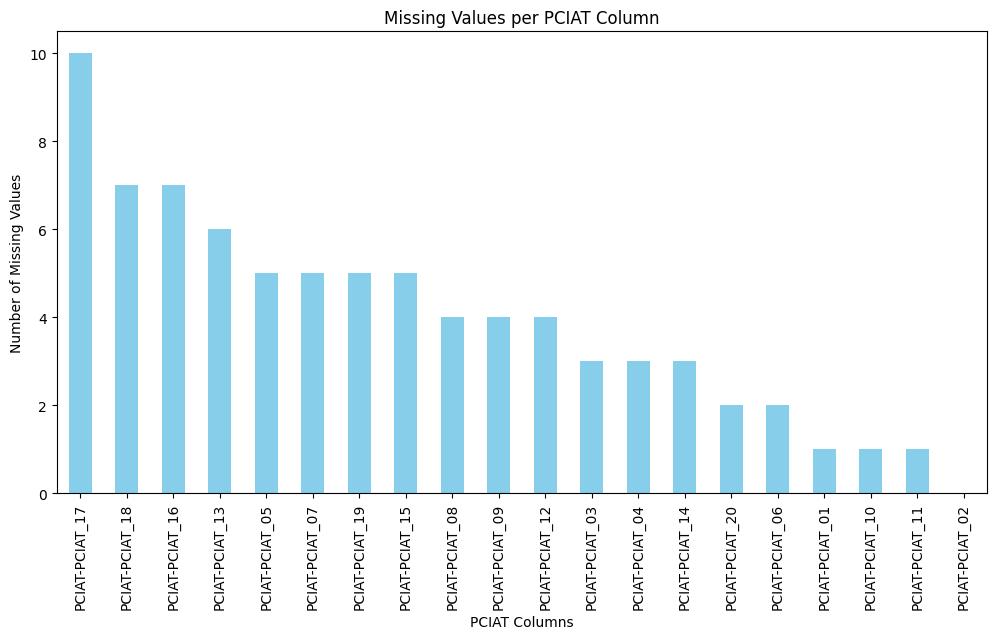

In [12]:
# Plot missing values per PCIAT column
plt.figure(figsize=(12, 6))
missing_values_per_column.plot(kind='bar', color='skyblue')
plt.title('Missing Values per PCIAT Column')
plt.xlabel('PCIAT Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


In [13]:
# List of PCIAT column names (before imputation)
pciat_columns = [
    'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 
    'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 
    'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 
    'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 
    'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'
]

# Mapping of PCIAT columns to the target names
pciat_column_mapping = {
    'PCIAT-PCIAT_01': 'disobey_time_limits',
    'PCIAT-PCIAT_02': 'neglect_chores',
    'PCIAT-PCIAT_03': 'prefer_online_over_family',
    'PCIAT-PCIAT_04': 'form_online_relationships',
    'PCIAT-PCIAT_05': 'parent_complains_time',
    'PCIAT-PCIAT_06': 'grades_suffer',
    'PCIAT-PCIAT_07': 'check_email_first',
    'PCIAT-PCIAT_08': 'withdrawn_from_others',
    'PCIAT-PCIAT_09': 'defensive_secretive',
    'PCIAT-PCIAT_10': 'sneaking_online',
    'PCIAT-PCIAT_11': 'alone_in_room_computing',
    'PCIAT-PCIAT_12': 'strange_calls_online_friends',
    'PCIAT-PCIAT_13': 'annoyed_if_bothered',
    'PCIAT-PCIAT_14': 'more_tired_fatigued',
    'PCIAT-PCIAT_15': 'preoccupied_with_online',
    'PCIAT-PCIAT_16': 'tantrums_over_interference',
    'PCIAT-PCIAT_17': 'online_over_hobbies',
    'PCIAT-PCIAT_18': 'angry_at_time_limits',
    'PCIAT-PCIAT_19': 'online_over_friends',
    'PCIAT-PCIAT_20': 'mood_improves_online'
}

# Count missing values per PCIAT column
missing_values_per_column = train[pciat_columns].isna().sum()

# Sort the missing values for better visibility
missing_values_per_column = missing_values_per_column.sort_values(ascending=False)

# Display the missing values count per column
print("Missing Values Count per PCIAT Column:")
print(missing_values_per_column)

# Mapping the columns from PCIAT columns to their corresponding target names
mapped_missing_values = missing_values_per_column.index.to_series().map(pciat_column_mapping)

# Print the columns and their corresponding target names with missing counts
for pciat_column, missing_count in missing_values_per_column.items():
    target_column = pciat_column_mapping[pciat_column]
    print(f"Target Column: {target_column} (PCIAT Column: {pciat_column}) - Missing Values: {missing_count}")


Missing Values Count per PCIAT Column:
PCIAT-PCIAT_17    10
PCIAT-PCIAT_18     7
PCIAT-PCIAT_16     7
PCIAT-PCIAT_13     6
PCIAT-PCIAT_05     5
PCIAT-PCIAT_07     5
PCIAT-PCIAT_19     5
PCIAT-PCIAT_15     5
PCIAT-PCIAT_08     4
PCIAT-PCIAT_09     4
PCIAT-PCIAT_12     4
PCIAT-PCIAT_03     3
PCIAT-PCIAT_04     3
PCIAT-PCIAT_14     3
PCIAT-PCIAT_20     2
PCIAT-PCIAT_06     2
PCIAT-PCIAT_01     1
PCIAT-PCIAT_10     1
PCIAT-PCIAT_11     1
PCIAT-PCIAT_02     0
dtype: int64
Target Column: online_over_hobbies (PCIAT Column: PCIAT-PCIAT_17) - Missing Values: 10
Target Column: angry_at_time_limits (PCIAT Column: PCIAT-PCIAT_18) - Missing Values: 7
Target Column: tantrums_over_interference (PCIAT Column: PCIAT-PCIAT_16) - Missing Values: 7
Target Column: annoyed_if_bothered (PCIAT Column: PCIAT-PCIAT_13) - Missing Values: 6
Target Column: parent_complains_time (PCIAT Column: PCIAT-PCIAT_05) - Missing Values: 5
Target Column: check_email_first (PCIAT Column: PCIAT-PCIAT_07) - Missing Values: 5
Tar

In [14]:
import pandas as pd

# Define the column mapping
column_mapping = {
    'PCIAT-PCIAT_01': 'disobey_time_limits',
    'PCIAT-PCIAT_02': 'neglect_chores',
    'PCIAT-PCIAT_03': 'prefer_online_over_family',
    'PCIAT-PCIAT_04': 'form_online_relationships',
    'PCIAT-PCIAT_05': 'parent_complains_time',
    'PCIAT-PCIAT_06': 'grades_suffer',
    'PCIAT-PCIAT_07': 'check_email_first',
    'PCIAT-PCIAT_08': 'withdrawn_from_others',
    'PCIAT-PCIAT_09': 'defensive_secretive',
    'PCIAT-PCIAT_10': 'sneaking_online',
    'PCIAT-PCIAT_11': 'alone_in_room_computing',
    'PCIAT-PCIAT_12': 'strange_calls_online_friends',
    'PCIAT-PCIAT_13': 'annoyed_if_bothered',
    'PCIAT-PCIAT_14': 'more_tired_fatigued',
    'PCIAT-PCIAT_15': 'preoccupied_with_online',
    'PCIAT-PCIAT_16': 'tantrums_over_interference',
    'PCIAT-PCIAT_17': 'online_over_hobbies',
    'PCIAT-PCIAT_18': 'angry_at_time_limits',
    'PCIAT-PCIAT_19': 'online_over_friends',
    'PCIAT-PCIAT_20': 'mood_improves_online'
}

# Rename the columns in the DataFrame
train.rename(columns=column_mapping, inplace=True)

# Display the first few rows of the renamed DataFrame
train.head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,angry_at_time_limits,online_over_friends,mood_improves_online,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


In [15]:
# Function to calculate correlation of PCIAT columns with selected features
def get_correlations_with_pciat(pciat_columns, selected_features):
    correlation_results = {}
    
    for pciat_column in pciat_columns:
        correlations = {}
        for feature in selected_features:
            # Calculate the correlation for each PCIAT column with each selected feature
            correlation = train[pciat_column].corr(train[feature])
            correlations[feature] = correlation
        correlation_results[pciat_column] = correlations
    
    return correlation_results

# Extract the PCIAT columns from the column_mapping dictionary (values)
pciat_columns = list(column_mapping.values())

# Selected features to correlate with PCIAT columns
selected_features = [
    'Basic_Demos-Age', 'Basic_Demos-Sex', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'
]

# Getting correlation results for each PCIAT column
correlation_results = get_correlations_with_pciat(pciat_columns, selected_features)

# Displaying the correlation results
for pciat_column, correlations in correlation_results.items():
    print(f"Correlations for {pciat_column}:")
    for feature, corr_value in correlations.items():
        print(f"  {feature}: {corr_value}")
    print()


Correlations for disobey_time_limits:
  Basic_Demos-Age: 0.13929610271810552
  Basic_Demos-Sex: -0.10323534364108686
  SDS-SDS_Total_T: 0.20714365675133536
  PreInt_EduHx-computerinternet_hoursday: 0.18533290239811553

Correlations for neglect_chores:
  Basic_Demos-Age: 0.3014123285508863
  Basic_Demos-Sex: -0.06990014388225514
  SDS-SDS_Total_T: 0.21991816646824994
  PreInt_EduHx-computerinternet_hoursday: 0.30275542313547515

Correlations for prefer_online_over_family:
  Basic_Demos-Age: 0.3121016485988924
  Basic_Demos-Sex: -0.112491688414507
  SDS-SDS_Total_T: 0.19347654892602775
  PreInt_EduHx-computerinternet_hoursday: 0.3147088678166843

Correlations for form_online_relationships:
  Basic_Demos-Age: 0.42424582868002564
  Basic_Demos-Sex: -0.08290284501514726
  SDS-SDS_Total_T: 0.07076405343661912
  PreInt_EduHx-computerinternet_hoursday: 0.3161592528542454

Correlations for parent_complains_time:
  Basic_Demos-Age: 0.30122236009765335
  Basic_Demos-Sex: -0.09614463672792482
  SD

In [16]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,angry_at_time_limits,online_over_friends,mood_improves_online,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


In [17]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Columns and their correlated features for imputation
# Updated correlation map based on correlation values > 0.2

correlation_map = {
    'disobey_time_limits': ['SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
    'neglect_chores': ['PreInt_EduHx-computerinternet_hoursday', 'SDS-SDS_Total_T'],
    'prefer_online_over_family': ['Basic_Demos-Age', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
    'form_online_relationships': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'parent_complains_time': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'grades_suffer': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'check_email_first': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'withdrawn_from_others': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'defensive_secretive': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'sneaking_online': ['PreInt_EduHx-computerinternet_hoursday'],
    'alone_in_room_computing': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'strange_calls_online_friends': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'annoyed_if_bothered': ['SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
    'more_tired_fatigued': ['Basic_Demos-Age', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
    'preoccupied_with_online': ['Basic_Demos-Age', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
    'tantrums_over_interference': ['SDS-SDS_Total_T'],
    'online_over_hobbies': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'angry_at_time_limits': ['SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday'],
    'online_over_friends': ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday'],
    'mood_improves_online': ['SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']
}

# Create a dictionary to store imputed records and the correlation features used
imputed_records = {}

# Impute missing values for each column
for column, correlated_columns in correlation_map.items():
    # Select the relevant columns for imputation
    selected_columns = [column] + correlated_columns
    imputed_values = knn_imputer.fit_transform(train[selected_columns])
    
    # Identify the rows where imputation occurred (NaN values replaced)
    imputed_indices = train[column].isna()  # Rows where values were NaN
    
    # Count the number of imputed values
    n_imputed = imputed_indices.sum()  # Count of NaN values replaced
    
    # Store the imputed values and correlation features used
    imputed_records[column] = {
        'imputed_count': n_imputed,
        'correlated_features': correlated_columns,
        'updated_rows': imputed_values[:, 0],  # Only update the imputed column
        'imputed_indices': imputed_indices  # Store indices of imputed rows
    }
    
    # Update the original column with imputed values for NaNs
    train[column] = imputed_values[:, 0]  # Only update the imputed column

# Print imputed records and the number of imputed rows, with imputed row indices
for column, data in imputed_records.items():
    print(f"Column: {column}")
    print(f"Imputed records count: {data['imputed_count']}")
    print(f"Correlation features used: {data['correlated_features']}")
    
    # Get indices of imputed rows and display the first 5 updated rows (indices)
    imputed_row_indices = data['imputed_indices'].to_numpy().nonzero()[0]  # Convert to NumPy array and use nonzero
    
    print(f"Imputed rows indices (sample): {imputed_row_indices[:5]}")  # Show first 5 imputed row indices
    print(f"Updated rows (sample): {train.iloc[imputed_row_indices[:5]][column].values}")  # Show first 5 imputed values
    print("\n")

Column: disobey_time_limits
Imputed records count: 1
Correlation features used: ['SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']
Imputed rows indices (sample): [1321]
Updated rows (sample): [3.4]


Column: neglect_chores
Imputed records count: 0
Correlation features used: ['PreInt_EduHx-computerinternet_hoursday', 'SDS-SDS_Total_T']
Imputed rows indices (sample): []
Updated rows (sample): []


Column: prefer_online_over_family
Imputed records count: 3
Correlation features used: ['Basic_Demos-Age', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']
Imputed rows indices (sample): [1054 2015 2133]
Updated rows (sample): [3.  3.4 1.8]


Column: form_online_relationships
Imputed records count: 3
Correlation features used: ['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday']
Imputed rows indices (sample): [1178 1212 1321]
Updated rows (sample): [2.4 1.4 1.6]


Column: parent_complains_time
Imputed records count: 5
Correlation features used: ['Basic_Demos-Age',

In [18]:
train.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,tantrums_over_interference,online_over_hobbies,angry_at_time_limits,online_over_friends,mood_improves_online,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2734.000000,2734.000000,2341.000000,2526.000000,2529.000000,2571.000000,482.000000,2477.000000,2485.000000,2477.000000,...,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2734.000000,2526.000000,2524.000000,2652.000000,2734.000000
mean,10.238478,0.364301,65.156771,19.127368,55.900174,87.854854,26.634855,69.758579,81.817304,117.129189,...,1.453621,1.629773,1.613387,1.158888,0.943819,27.916606,40.976643,57.645800,1.015083,0.580834
std,3.427067,0.481322,11.812956,4.909532,7.394732,43.354601,5.231389,13.791864,13.769220,17.225069,...,1.494081,1.443754,1.527696,1.342728,1.185127,20.332283,10.233233,13.045111,1.080920,0.771244
min,5.000000,0.000000,25.000000,0.000000,36.000000,0.000000,19.000000,11.000000,27.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.780425,50.200000,57.200000,23.000000,61.000000,73.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.821413,55.000000,75.800000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,12.000000,1.000000,75.000000,21.173116,61.750000,111.500000,29.000000,76.000000,91.000000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,95.000000,46.102914,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [19]:
# Check for null values in the renamed columns
null_counts = train.isnull().sum()

# Filter for columns that have null values
columns_with_nulls = null_counts[null_counts > 0]

# Print the count of null values for each column with nulls
print(f"Columns with null values:\n{columns_with_nulls}")


Columns with null values:
CGAS-Season                                393
CGAS-CGAS_Score                            393
Physical-Season                            141
Physical-BMI                               208
Physical-Height                            205
Physical-Weight                            163
Physical-Waist_Circumference              2252
Physical-Diastolic_BP                      257
Physical-HeartRate                         249
Physical-Systolic_BP                       257
Fitness_Endurance-Season                  1474
Fitness_Endurance-Max_Stage               2003
Fitness_Endurance-Time_Mins               2006
Fitness_Endurance-Time_Sec                2006
FGC-Season                                  89
FGC-FGC_CU                                 816
FGC-FGC_CU_Zone                            851
FGC-FGC_GSND                              1862
FGC-FGC_GSND_Zone                         1870
FGC-FGC_GSD                               1863
FGC-FGC_GSD_Zone                  

We have cleared all the nan values for PCIAT columns now

In [20]:
# List of renamed PCIAT columns
pciat_columns = [
    'disobey_time_limits', 'neglect_chores', 'prefer_online_over_family', 
    'form_online_relationships', 'parent_complains_time', 'grades_suffer', 
    'check_email_first', 'withdrawn_from_others', 'defensive_secretive', 
    'sneaking_online', 'alone_in_room_computing', 'strange_calls_online_friends', 
    'annoyed_if_bothered', 'more_tired_fatigued', 'preoccupied_with_online', 
    'tantrums_over_interference', 'online_over_hobbies', 'angry_at_time_limits', 
    'online_over_friends', 'mood_improves_online'
]

# Step 1: Recalculate PCIAT Total (sum of the 20 columns)
train['PCIAT_total'] = train[pciat_columns].sum(axis=1)

# Step 2: Recalculate the SII (Severity Impairment Index) with numeric values
def calculate_sii(pciat_total):
    if pciat_total >= 0 and pciat_total <= 30:
        return 0  # None
    elif pciat_total >= 31 and pciat_total <= 49:
        return 1  # Mild
    elif pciat_total >= 50 and pciat_total <= 79:
        return 2  # Moderate
    elif pciat_total >= 80 and pciat_total <= 100:
        return 3  # Severe
    else:
        return -1  # Invalid, in case the total exceeds 100

# Apply the SII calculation to the PCIAT_total column
train['SII'] = train['PCIAT_total'].apply(calculate_sii)

# Step 3: Check for any invalid SII (-1 values)
invalid_sii_rows = train[train['SII'] == -1]
if not invalid_sii_rows.empty:
    print(f"Rows with invalid SII (-1):\n{invalid_sii_rows[['PCIAT_total', 'SII']].head()}")  # Display first few invalid rows
else:
    print("No invalid SII values (-1) found.")



Rows with invalid SII (-1):
      PCIAT_total  SII
24           30.4   -1
724          30.2   -1
877          79.2   -1
3672         49.8   -1


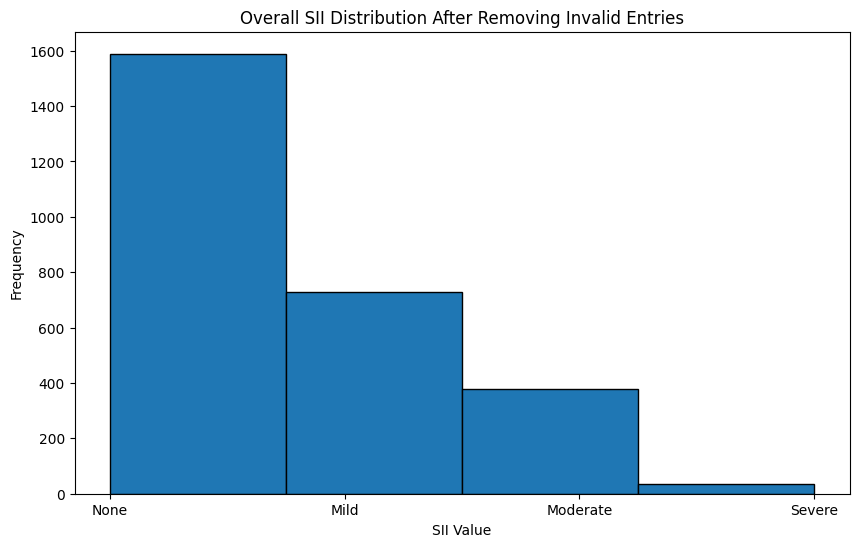

,PCIAT_total,SII
0,55.0,2
1,0.0,0
2,28.0,0
3,44.0,1
5,34.0,1


In [21]:
# Step 3: Remove rows with invalid SII (-1 values)
train_cleaned = train[train['SII'] != -1]

# Step 4: Check the overall distribution of SII
plt.figure(figsize=(10, 6))
plt.hist(train_cleaned['SII'], bins=4, edgecolor='black')  # Adjust bins for SII values (0-3)
plt.title('Overall SII Distribution After Removing Invalid Entries')
plt.xlabel('SII Value')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3], ['None', 'Mild', 'Moderate', 'Severe'])  # Label x-axis with SII categories
plt.show()

# Display the updated dataframe with PCIAT_total and SII for reference
train_cleaned[['PCIAT_total', 'SII']].head()

In [22]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming train is your DataFrame containing the relevant data

# # Step 1: Automatically generate the list of pciat column names (20 columns)
# PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]  # PCIAT-PCIAT_01 to PCIAT-PCIAT_20

# # Step 2: Define the recalculate_sii function
# def recalculate_sii(row):
#     if pd.isna(row['PCIAT-PCIAT_Total']):
#         return np.nan
#     max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
#     if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
#         return 0
#     elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
#         return 1
#     elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
#         return 2
#     elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
#         return 3
#     return np.nan

# # Step 3: Calculate pciat_total, mark as NaN if any pciat value is NaN
# train['PCIAT-PCIAT_Total'] = train[PCIAT_cols].apply(
#     lambda x: x.sum() if x.notna().all() else np.nan, axis=1
# )

# # Step 4: Count rows with PCIAT-PCIAT_Total as NaN
# nan_count = train['PCIAT-PCIAT_Total'].isna().sum()
# print(f"Number of rows with NaN in PCIAT-PCIAT_Total: {nan_count}")

# # Step 5: Drop rows where PCIAT-PCIAT_Total is NaN
# train = train.dropna(subset=['PCIAT-PCIAT_Total'])

# # Step 6: Recalculate SII using the recalculate_sii function on the cleaned data
# train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

# # Step 7: Visualize the SII distribution
# plt.figure(figsize=(10, 6))
# plt.hist(train['recalc_sii'], bins=20, edgecolor='black')
# plt.title('Recalculated SII Distribution After Data Cleaning')
# plt.xlabel('SII Value')
# plt.ylabel('Frequency')
# plt.show()

# # Show the first few rows of the cleaned data with recalc_sii
# train.head()


In [23]:
# train['recalc_sii'].unique()

only use the corrected SII. I will only use total scores if all PCIAT_cols have non-NA values (all questions of the Parent-Child Internet Addiction Test have been answered).

In [24]:
# train['sii'] = train['recalc_sii']

# train.drop(columns='recalc_sii', inplace=True)
# train.head()


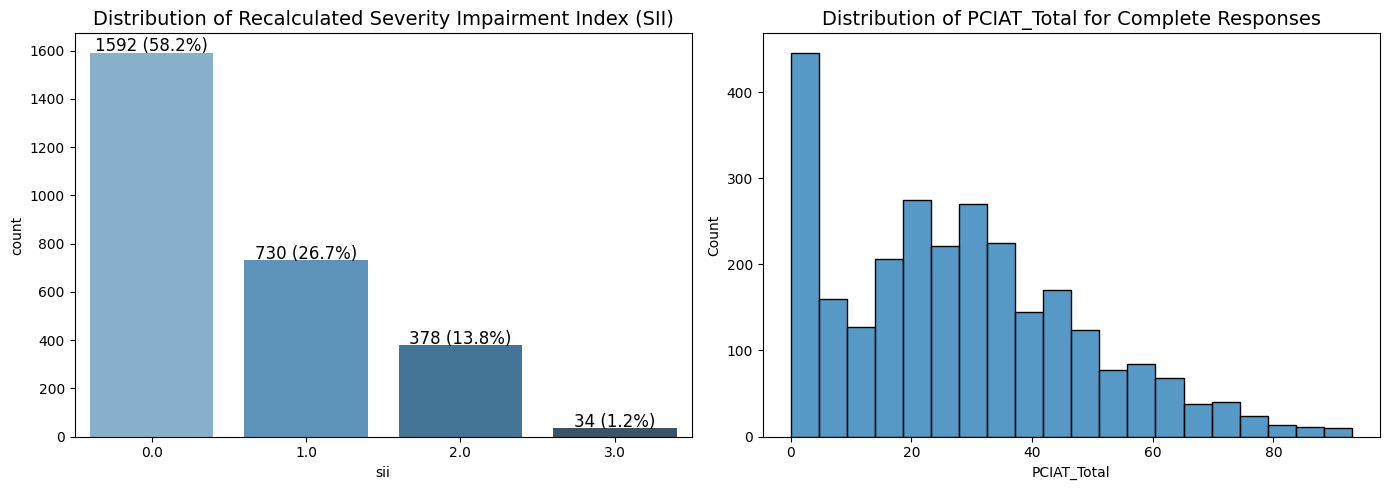

In [25]:
import seaborn as sns

# Step 1: Calculate SII counts and percentages
sii_counts = train['sii'].value_counts().reset_index()
sii_counts.columns = ['sii', 'count']  # Renaming columns for clarity
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

# Step 2: Create the subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII Distribution
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Distribution of Recalculated Severity Impairment Index (SII)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses (those without NaN)
sns.histplot(train['PCIAT-PCIAT_Total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total for Complete Responses', fontsize=14)
axes[1].set_xlabel('PCIAT_Total')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


In [26]:
# """Analyze SII distribution and class balance"""
sii_dist = train['sii'].value_counts()
print(sii_dist)
train.shape

sii
0.0    1592
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64


(2734, 84)

Remove records having missing sii

In [27]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,mood_improves_online,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,55.0,2
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0.0,0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,28.0,0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,44.0,1
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0,34.0,1


Around 1241 records don't have the SII, they are be used for unsupervised learning but for our case, we would have to do either imputation or remove them

sii
0.0    1592
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64


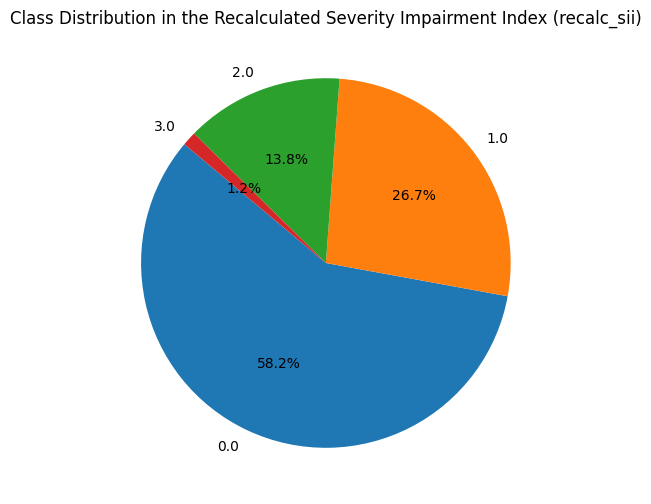

In [28]:
import matplotlib.pyplot as plt

# Step 1: Get the value counts for the recalculated 'recalc_sii' column
value_counts_recalc_sii = train['sii'].value_counts()

# Print value counts (Optional, for verification)
print(value_counts_recalc_sii)

# Step 2: Create the Pie Chart for recalculated SII (recalc_sii)
plt.figure(figsize=(8, 6))
plt.pie(value_counts_recalc_sii, labels=value_counts_recalc_sii.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in the Recalculated Severity Impairment Index (recalc_sii)')
plt.show()


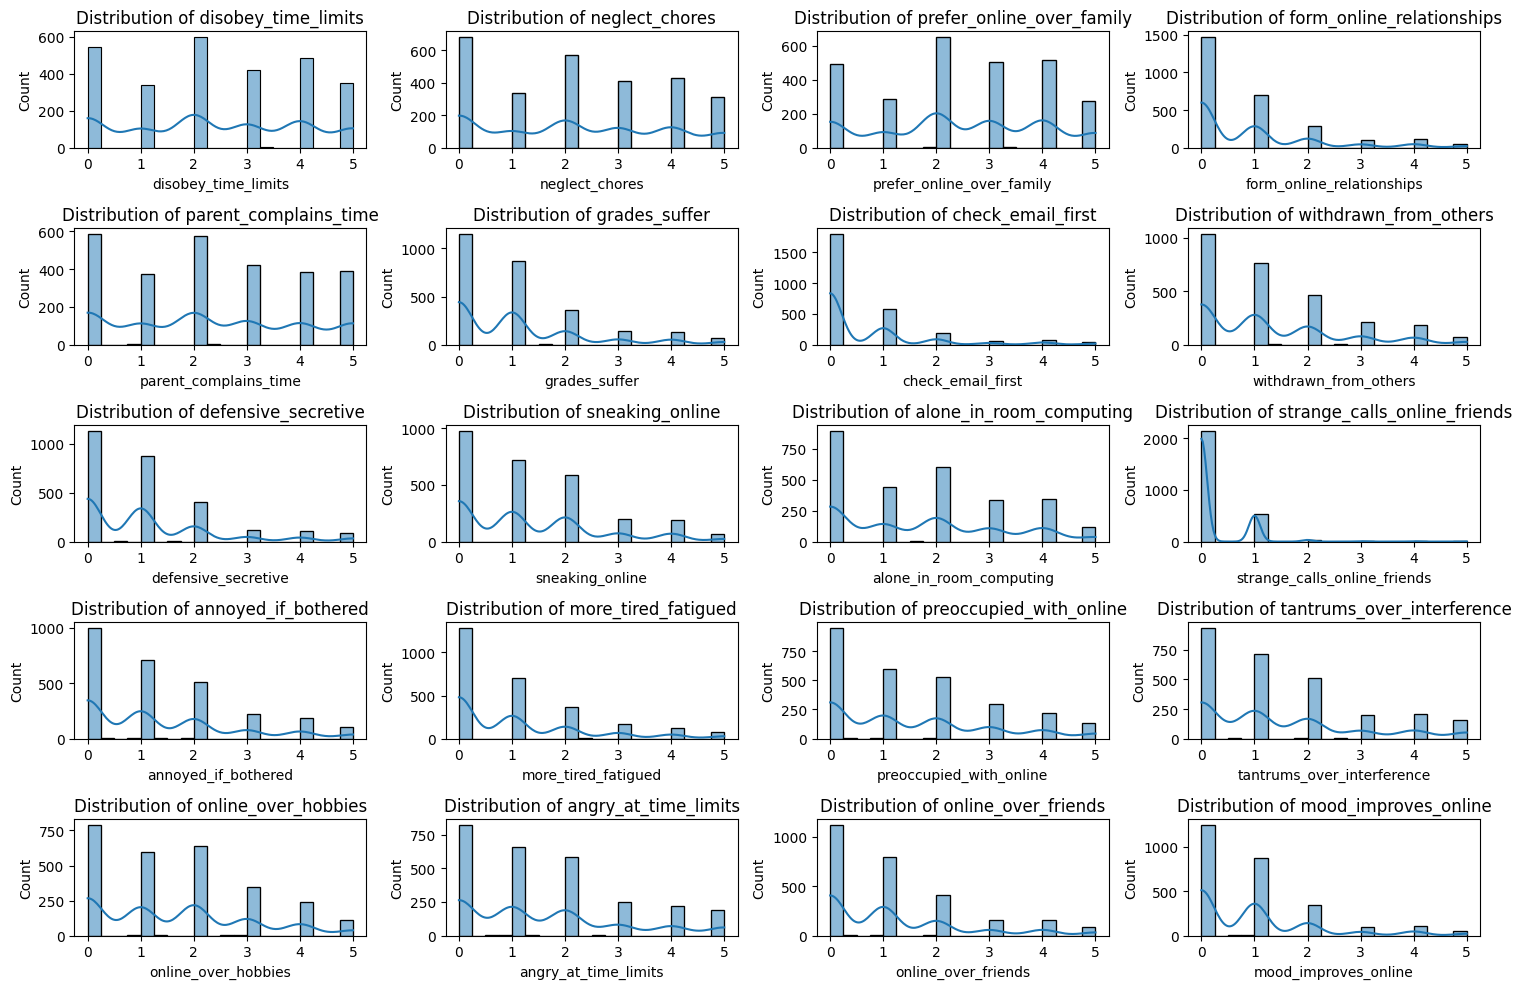

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size for the plot
plt.figure(figsize=(15, 10))

# Plot histograms for each renamed PCIAT column
for i, column in enumerate(column_mapping.values()):
    plt.subplot(5, 4, i+1)
    sns.histplot(train[column].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.tight_layout()

plt.show()
# Modify this

sii                             1.000000
preoccupied_with_online         0.750861
angry_at_time_limits            0.729898
online_over_hobbies             0.728033
parent_complains_time           0.722240
annoyed_if_bothered             0.704138
mood_improves_online            0.702322
tantrums_over_interference      0.697391
withdrawn_from_others           0.695357
neglect_chores                  0.694597
prefer_online_over_family       0.694567
sneaking_online                 0.690004
online_over_friends             0.682028
more_tired_fatigued             0.675653
defensive_secretive             0.660620
grades_suffer                   0.645124
disobey_time_limits             0.617929
alone_in_room_computing         0.609444
form_online_relationships       0.589649
check_email_first               0.461675
strange_calls_online_friends    0.370977
Name: sii, dtype: float64


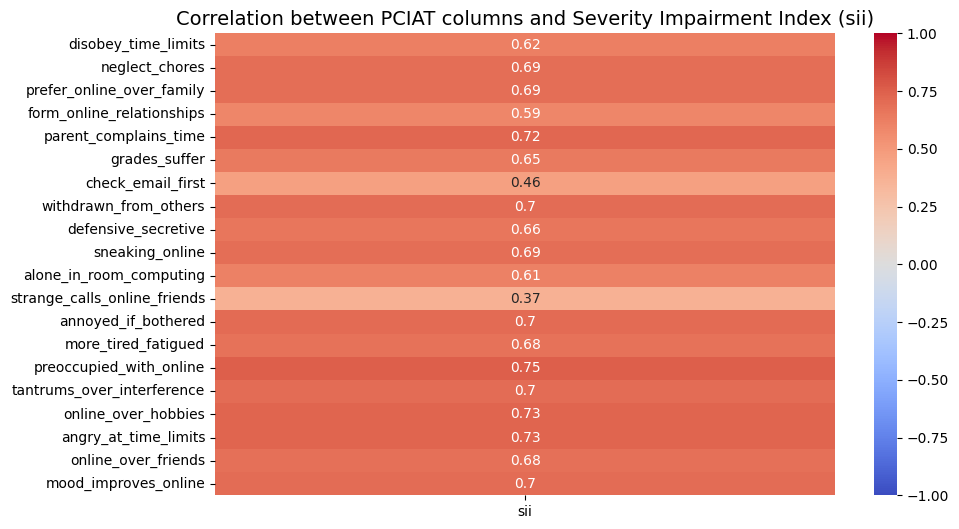

In [30]:
# Convert column_mapping values to a list and concatenate with 'sii'
pciat_columns = list(column_mapping.values())  # Convert dict_values to list

# Compute correlation
correlation = train[pciat_columns + ['sii']].corr()

# Extract the correlations with 'sii'
sii_correlation = correlation['sii'].sort_values(ascending=False)

# Show the correlation values
print(sii_correlation)

# Visualize the correlations with a heatmap
plt.figure(figsize=(10, 6))
# Select the correlation values of 'sii' with each PCIAT column
sns.heatmap(correlation.loc[pciat_columns, ['sii']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between PCIAT columns and Severity Impairment Index (sii)', fontsize=14)
plt.show()

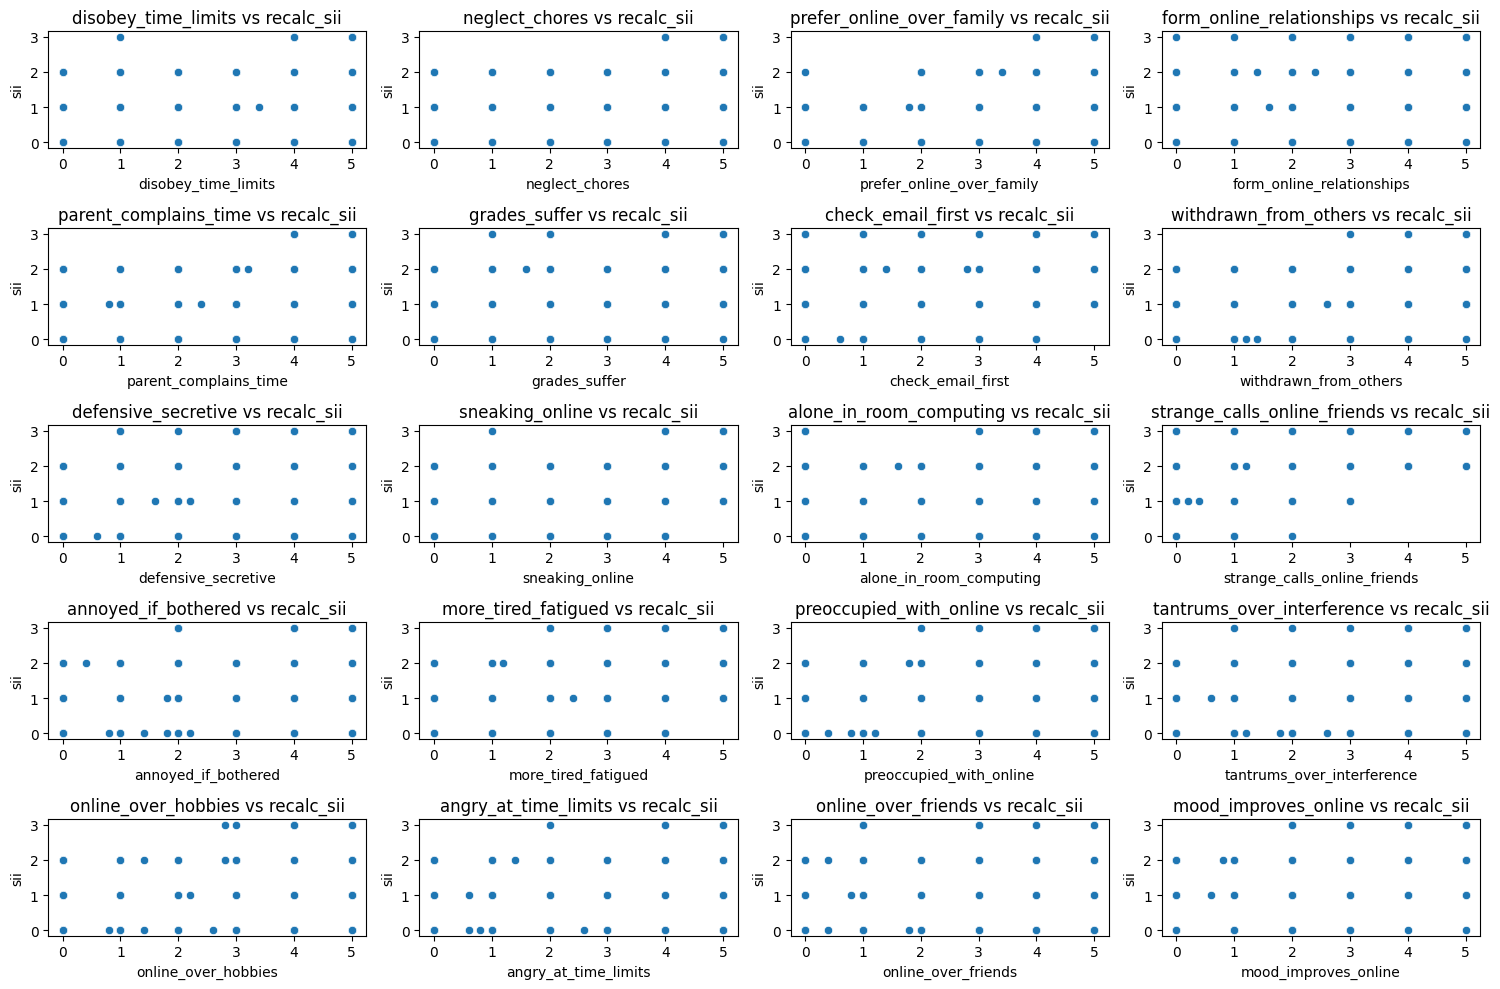

In [31]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Scatter plot for each PCIAT column vs recalc_sii
for i, column in enumerate(pciat_columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=train[column], y=train['sii'])
    plt.title(f'{column} vs recalc_sii', fontsize=12)
    plt.tight_layout()

plt.show()
# this has to be modified

Cleaning and understanding demographic fields

In [32]:
print(train['Basic_Demos-Enroll_Season'].unique())
print(train['Basic_Demos-Age'].unique())
print(train['Basic_Demos-Sex'].unique())

['Fall' 'Summer' 'Winter' 'Spring']
[ 5  9 10 13 11  7  6 14 16 12 15 17  8 18 19 21 20 22]
[0 1]


In [33]:
# Check for missing values
print(train[['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']].isna().sum())


Basic_Demos-Enroll_Season    0
Basic_Demos-Age              0
Basic_Demos-Sex              0
dtype: int64


In [34]:
# Summary statistics
print(train['Basic_Demos-Age'].describe())


count    2734.000000
mean       10.238478
std         3.427067
min         5.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        22.000000
Name: Basic_Demos-Age, dtype: float64


In [35]:
# Check the minimum and maximum ages
age_min = train['Basic_Demos-Age'].min()
age_max = train['Basic_Demos-Age'].max()

print(f"Age range: {age_min} - {age_max}")


Age range: 5 - 22


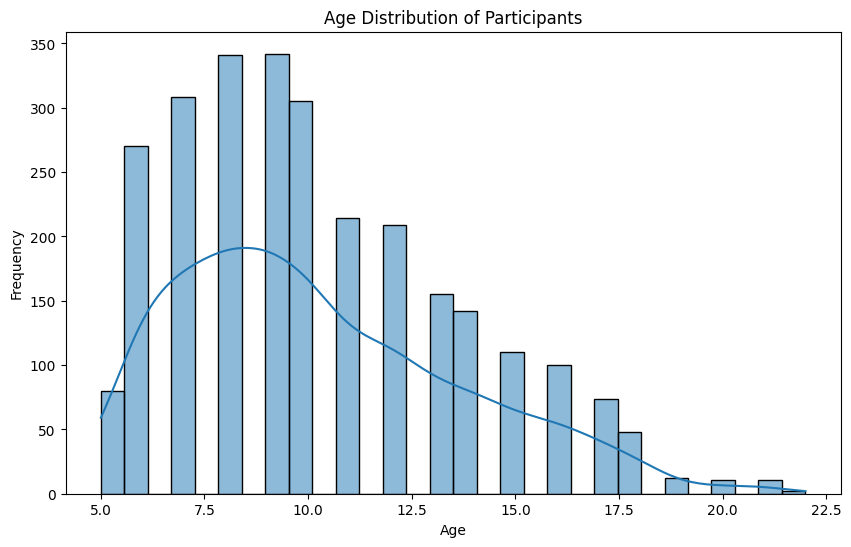

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['Basic_Demos-Age'], kde=True)
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [37]:
# Correlation between age and 'sii'
age_correlation = train[['Basic_Demos-Age', 'sii']].corr()
print(f"Correlation between Age and sii: {age_correlation.loc['Basic_Demos-Age', 'sii']}")

Correlation between Age and sii: 0.36634004979099916


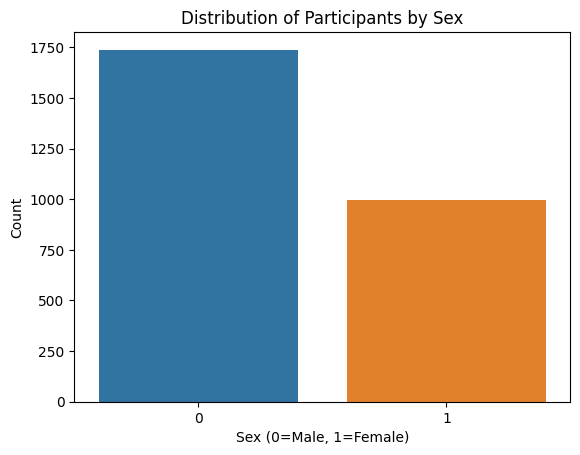

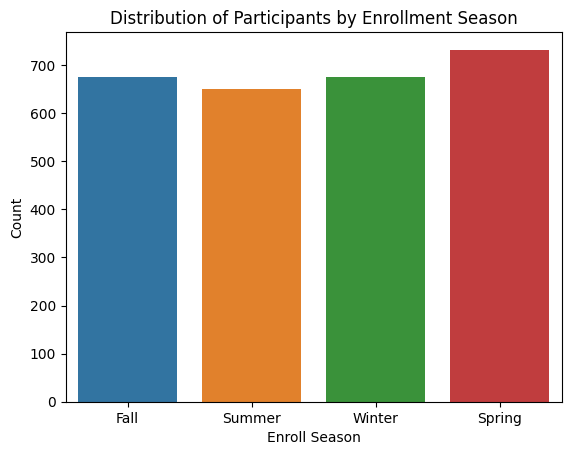

In [38]:
# Count plot for Basic_Demos-Sex
sns.countplot(data=train, x='Basic_Demos-Sex')
plt.title('Distribution of Participants by Sex')
plt.xlabel('Sex (0=Male, 1=Female)')
plt.ylabel('Count')
plt.show()

# Count plot for Basic_Demos-Enroll_Season
sns.countplot(data=train, x='Basic_Demos-Enroll_Season')
plt.title('Distribution of Participants by Enrollment Season')
plt.xlabel('Enroll Season')
plt.ylabel('Count')
plt.show()


In [39]:
from scipy import stats

# Assuming 'train' is your DataFrame and 'Basic_Demos-Sex' is the column for Sex, 'sii' is the target
group1 = train[train['Basic_Demos-Sex'] == 0]['sii']
group2 = train[train['Basic_Demos-Sex'] == 1]['sii']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 5.256173990460574, P-value: 1.5843371531430984e-07


Sex is an important feature to consider for building your model since it has a significant relationship with the target variable sii

In [40]:
# Perform ANOVA for 'Enrollment Season' vs 'sii'
f_stat, p_value = stats.f_oneway(
    train[train['Basic_Demos-Enroll_Season'] == 'Fall']['sii'],
    train[train['Basic_Demos-Enroll_Season'] == 'Spring']['sii'],
    train[train['Basic_Demos-Enroll_Season'] == 'Summer']['sii'],
    train[train['Basic_Demos-Enroll_Season'] == 'Winter']['sii']
)

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 1.5217552939330776, P-value: 0.20680116308108532


Therefore, Enrollment Season does not have a significant impact on sii at the 5% significance level.

In [41]:
# Drop 'Enrollment Season' column from the training dataframe
train = train.drop(columns=['Basic_Demos-Enroll_Season'])

In [42]:
# Calculate Pearson's correlation between 'age' and 'sii'
age_corr = train['Basic_Demos-Age'].corr(train['sii'])
print(f"Pearson correlation between age and sii: {age_corr}")


Pearson correlation between age and sii: 0.3663400497909984


In [43]:
def process_age(df):
    # Define bins for age grouping
    bins = [0, 5, 12, 15, 18, 22]  # Adjusted to start from 0 as 'Child' should be 0-5
    labels = ['Child', 'Early Teen', 'Teen', 'Young Adult', 'Adult']
    
    # Create 'age_group' by categorizing 'Basic_Demos-Age'
    df['age_group'] = pd.cut(df['Basic_Demos-Age'], 
                             bins=bins, 
                             labels=labels, 
                             right=True,  # Include the upper bound of each bin
                             include_lowest=True)  # Include the lower bound for the first group
    
    # Check if any NaN values exist in the 'age_group' column
    if df['age_group'].isna().sum() > 0:
        print(f"Warning: There are {df['age_group'].isna().sum()} NaN values in 'age_group'.")

    return df

# Apply the function to the train DataFrame to create and process the 'age_group' column
train = process_age(train)

# Check if the 'age_group' column is now present
print("Columns in processed DataFrame:", train.columns)

# Check the first few rows to confirm the 'age_group' assignment
print(train[['Basic_Demos-Age', 'age_group']].head())


Columns in processed DataFrame: Index(['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season',
       'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height',
       'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_L

In [44]:
train.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII,age_group
0,00008ff9,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,55.0,NaN,NaN,NaN,Fall,3.0,2.0,55.0,2,Child
1,000fd460,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0.0,0,Early Teen
2,00105258,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,28.0,Fall,38.0,54.0,Summer,2.0,0.0,28.0,0,Early Teen
3,00115b9f,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,44.0,Summer,31.0,45.0,Winter,0.0,1.0,44.0,1,Early Teen
5,001f3379,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,34.0,Summer,40.0,56.0,Spring,0.0,1.0,34.0,1,Teen


In [45]:
# Check for NaN values in the 'age_group' column
nan_count = train['age_group'].isna().sum()
print(f"NaN values in 'age_group': {nan_count}")

# Optionally, check the rows with NaN values (if any)
if nan_count > 0:
    print(train[train['age_group'].isna()])


NaN values in 'age_group': 0


In [46]:
import os
output_dir = '/kaggle/working/child-mind-institute-problematic-internet-use'
os.makedirs(output_dir, exist_ok=True)


In [47]:
import pandas as pd

# List of columns to remove
columns_to_remove = [
    "CGAS-Season", "CGAS-CGAS_Score",
    "Physical-Season", "Physical-BMI", "Physical-Height", "Physical-Weight",
    "Physical-Waist_Circumference", "Physical-Diastolic_BP", "Physical-HeartRate",
    "Physical-Systolic_BP", "Fitness_Endurance-Season", "Fitness_Endurance-Max_Stage",
    "Fitness_Endurance-Time_Mins", "Fitness_Endurance-Time_Sec",
    "FGC-Season", "FGC-FGC_CU", "FGC-FGC_CU_Zone", "FGC-FGC_GSND",
    "FGC-FGC_GSND_Zone", "FGC-FGC_GSD", "FGC-FGC_GSD_Zone", "FGC-FGC_PU",
    "FGC-FGC_PU_Zone", "FGC-FGC_SRL", "FGC-FGC_SRL_Zone", "FGC-FGC_SRR",
    "FGC-FGC_SRR_Zone", "FGC-FGC_TL", "FGC-FGC_TL_Zone",
    "BIA-Season", "BIA-BIA_Activity_Level_num", "BIA-BIA_BMC",
    "BIA-BIA_BMI", "BIA-BIA_BMR", "BIA-BIA_DEE", "BIA-BIA_ECW",
    "BIA-BIA_FFM", "BIA-BIA_FFMI", "BIA-BIA_FMI", "BIA-BIA_Fat",
    "BIA-BIA_Frame_num", "BIA-BIA_ICW", "BIA-BIA_LDM",
    "BIA-BIA_LST", "BIA-BIA_SMM", "BIA-BIA_TBW",
    "PAQ_A-Season", "PAQ_A-PAQ_A_Total",
    "PAQ_C-Season", "PAQ_C-PAQ_C_Total",
    "PCIAT-Season", "PCIAT-PCIAT_01", "PCIAT-PCIAT_02", "PCIAT-PCIAT_03",
    "PCIAT-PCIAT_04", "PCIAT-PCIAT_05", "PCIAT-PCIAT_06", "PCIAT-PCIAT_07",
    "PCIAT-PCIAT_08", "PCIAT-PCIAT_09", "PCIAT-PCIAT_10", "PCIAT-PCIAT_11",
    "PCIAT-PCIAT_12", "PCIAT-PCIAT_13", "PCIAT-PCIAT_14", "PCIAT-PCIAT_15",
    "PCIAT-PCIAT_16", "PCIAT-PCIAT_17", "PCIAT-PCIAT_18", "PCIAT-PCIAT_19",
    "PCIAT-PCIAT_20", "PCIAT-PCIAT_Total"
]

# Drop the specified columns
processed_df = train.drop(columns=columns_to_remove, errors='ignore')

# Save the processed DataFrame to a CSV file
processed_df.to_csv('/kaggle/working/child-mind-institute-problematic-internet-use/processed_demographics_pciat.csv', index=False)

print("Processed DataFrame saved as 'processed_demographics.csv'.")


Processed DataFrame saved as 'processed_demographics.csv'.


Now I am starting with this processed dataset and will work on remaining fields cleaning and preprocessing

Internet usage data is crucial to this task because Problematic internet use (PIU), also known as internet addiction or compulsive internet use, refers to excessive and unhealthy use of the internet that interferes with a person’s daily life, responsibilities, and social relationships. The internet usage data provides a direct measure of how much time each participant spends online.

In [48]:
# Load the training data
path="/kaggle/working/child-mind-institute-problematic-internet-use/processed_demographics_pciat.csv"
train = pd.read_csv(path)
train.head(5)

,id,Basic_Demos-Age,Basic_Demos-Sex,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,check_email_first,...,mood_improves_online,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII,age_group
0,00008ff9,5,0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,...,4.0,NaN,NaN,NaN,Fall,3.0,2.0,55.0,2,Child
1,000fd460,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0.0,0,Early Teen
2,00105258,10,1,5.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,Fall,38.0,54.0,Summer,2.0,0.0,28.0,0,Early Teen
3,00115b9f,9,0,4.0,2.0,4.0,0.0,5.0,1.0,0.0,...,1.0,Summer,31.0,45.0,Winter,0.0,1.0,44.0,1,Early Teen
4,001f3379,13,1,3.0,3.0,3.0,0.0,2.0,1.0,0.0,...,1.0,Summer,40.0,56.0,Spring,0.0,1.0,34.0,1,Teen


In [49]:
# Display the list of columns
cleaned_columns = train.columns.tolist()
cleaned_columns

['id',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'disobey_time_limits',
 'neglect_chores',
 'prefer_online_over_family',
 'form_online_relationships',
 'parent_complains_time',
 'grades_suffer',
 'check_email_first',
 'withdrawn_from_others',
 'defensive_secretive',
 'sneaking_online',
 'alone_in_room_computing',
 'strange_calls_online_friends',
 'annoyed_if_bothered',
 'more_tired_fatigued',
 'preoccupied_with_online',
 'tantrums_over_interference',
 'online_over_hobbies',
 'angry_at_time_limits',
 'online_over_friends',
 'mood_improves_online',
 'SDS-Season',
 'SDS-SDS_Total_Raw',
 'SDS-SDS_Total_T',
 'PreInt_EduHx-Season',
 'PreInt_EduHx-computerinternet_hoursday',
 'sii',
 'PCIAT_total',
 'SII',
 'age_group']

In [50]:
# # List of columns to drop
# columns_to_remove = [
#     'disobey_time_limits', 'neglect_chores', 'prefer_online_over_family',
#     'form_online_relationships', 'parent_complains_time', 'grades_suffer',
#     'check_email_first', 'withdrawn_from_others', 'defensive_secretive',
#     'sneaking_online', 'alone_in_room_computing', 'strange_calls_online_friends',
#     'annoyed_if_bothered', 'more_tired_fatigued', 'preoccupied_with_online',
#     'tantrums_over_interference', 'online_over_hobbies', 'angry_at_time_limits',
#     'online_over_friends', 'mood_improves_online'
# ]

# # Remove the specified columns from the cleaned DataFrame
# further_cleaned_df = train.drop(columns=columns_to_remove, errors='ignore')

# # Save the further cleaned DataFrame to a new CSV
# output_path_cleaned = '/kaggle/working/child-mind-institute-problematic-internet-use/processed_demographics_pciat1.csv'
# further_cleaned_df.to_csv(output_path_cleaned, index=False)

# print(f"Further cleaned DataFrame saved at: {output_path_cleaned}")


In [51]:
# # Load the training data
# path="/kaggle/working/child-mind-institute-problematic-internet-use/processed_demographics_pciat.csv"
# train = pd.read_csv(path)
# train.head(5)

In [52]:
# # Display the list of columns
# cleaned_columns = train.columns.tolist()
# cleaned_columns

In [53]:
train['PreInt_EduHx-computerinternet_hoursday'].unique()

array([ 3.,  0.,  2.,  1., nan])

In [54]:
# Check correlation between numerical features and 'sii'
# Correlation between Hours of Computer Usage and SII
corr_hours_sii = train[['PreInt_EduHx-computerinternet_hoursday', 'sii']].corr()
print("Correlation between Hours and SII:\n", corr_hours_sii)

# Encoding 'PreInt_EduHx-Season' for correlation check
train['Season_Encoded'] = train['PreInt_EduHx-Season'].map({
    'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4
})

Correlation between Hours and SII:
                                         PreInt_EduHx-computerinternet_hoursday  \
PreInt_EduHx-computerinternet_hoursday                                1.000000   
sii                                                                   0.336699   

                                             sii  
PreInt_EduHx-computerinternet_hoursday  0.336699  
sii                                     1.000000  


In [55]:
from scipy.stats import pointbiserialr
# Point-biserial correlation between categorical season and hours (numerical)
# season_hours_corr, _ = pointbiserialr(train['Season_Encoded'].dropna(), train['PreInt_EduHx-computerinternet_hoursday'].dropna())
# print(f"Point-biserial correlation between Season and Hours: {season_hours_corr:.2f}")
# Remove rows where either 'Season_Encoded' or 'PreInt_EduHx-computerinternet_hoursday' is NaN
cleaned_data = train.dropna(subset=['Season_Encoded', 'PreInt_EduHx-computerinternet_hoursday'])

# Point-biserial correlation between categorical season and hours (numerical)
season_hours_corr, _ = pointbiserialr(cleaned_data['Season_Encoded'], cleaned_data['PreInt_EduHx-computerinternet_hoursday'])

print(f"Point-biserial correlation between Season and Hours: {season_hours_corr:.2f}")

Point-biserial correlation between Season and Hours: 0.02


Since the correlation is positive, it suggests that as the "Season" variable increases (e.g., from one category to the other, such as Winter to Summer), "Hours" tends to increase slightly as well. However, since the correlation is so small, this relationship is statistically insignificant.
The correlation of 0.02 suggests that the season (categorical variable) has almost no linear relationship with the number of hours spent on the computer/internet (numerical variable). This is generally a very weak relationship. should not rely heavily on the season to predict or infer anything meaningful about the hours of computer usage in your dataset. The season may not be a strong feature to focus on when modeling the data.

In [56]:
# Check the correlation between this season and sii
cleaned_data = train.dropna(subset=['Season_Encoded'])
# Point-biserial correlation between Season_Encoded and sii
season_sii_corr, _ = pointbiserialr(cleaned_data['Season_Encoded'], cleaned_data['sii'])
print(f"Point-biserial correlation between Season and SII: {season_sii_corr:.2f}")


Point-biserial correlation between Season and SII: 0.04


In [57]:
import scipy.stats as stats

# ANOVA test for Season_Encoded across different levels of sii
f_stat, p_value = stats.f_oneway(
    train[train['sii'] == 0]['Season_Encoded'].dropna(),
    train[train['sii'] == 1]['Season_Encoded'].dropna(),
    train[train['sii'] == 2]['Season_Encoded'].dropna(),
    train[train['sii'] == 3]['Season_Encoded'].dropna()
)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")


ANOVA F-statistic: 1.91, p-value: 0.1264


In [58]:
train = train.drop(columns=['PreInt_EduHx-Season','Season_Encoded'], errors='ignore')
train.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,check_email_first,...,online_over_friends,mood_improves_online,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII,age_group
0,00008ff9,5,0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,...,2.0,4.0,NaN,NaN,NaN,3.0,2.0,55.0,2,Child
1,000fd460,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Fall,46.0,64.0,0.0,0.0,0.0,0,Early Teen
2,00105258,10,1,5.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,Fall,38.0,54.0,2.0,0.0,28.0,0,Early Teen
3,00115b9f,9,0,4.0,2.0,4.0,0.0,5.0,1.0,0.0,...,4.0,1.0,Summer,31.0,45.0,0.0,1.0,44.0,1,Early Teen
4,001f3379,13,1,3.0,3.0,3.0,0.0,2.0,1.0,0.0,...,2.0,1.0,Summer,40.0,56.0,0.0,1.0,34.0,1,Teen


In [59]:
# Select only numeric columns for correlation
numeric_columns = train.select_dtypes(include=['number']).columns

numeric_columns

Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'disobey_time_limits',
       'neglect_chores', 'prefer_online_over_family',
       'form_online_relationships', 'parent_complains_time', 'grades_suffer',
       'check_email_first', 'withdrawn_from_others', 'defensive_secretive',
       'sneaking_online', 'alone_in_room_computing',
       'strange_calls_online_friends', 'annoyed_if_bothered',
       'more_tired_fatigued', 'preoccupied_with_online',
       'tantrums_over_interference', 'online_over_hobbies',
       'angry_at_time_limits', 'online_over_friends', 'mood_improves_online',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T',
       'PreInt_EduHx-computerinternet_hoursday', 'sii', 'PCIAT_total', 'SII'],
      dtype='object')

In [60]:
# Calculate the correlation matrix for the numeric features
corr_matrix = train[numeric_columns].corr()
corr_matrix

,Basic_Demos-Age,Basic_Demos-Sex,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,check_email_first,withdrawn_from_others,...,online_over_hobbies,angry_at_time_limits,online_over_friends,mood_improves_online,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII
Basic_Demos-Age,1.000000,0.052233,0.139335,0.301412,0.312252,0.424684,0.301622,0.434157,0.536488,0.345670,...,0.286870,0.159601,0.302396,0.285477,0.013947,0.015360,0.425147,0.366340,0.411006,0.362303
Basic_Demos-Sex,0.052233,1.000000,-0.103388,-0.069900,-0.112114,-0.082125,-0.096058,-0.053940,0.049378,-0.038494,...,-0.102072,-0.109839,-0.104882,-0.068278,-0.012997,-0.012645,-0.006892,-0.100056,-0.093181,-0.099660
disobey_time_limits,0.139335,-0.103388,1.000000,0.698023,0.661669,0.355451,0.682392,0.438225,0.227045,0.477808,...,0.544738,0.629864,0.433893,0.441063,0.203631,0.207135,0.185500,0.617929,0.727775,0.612714
neglect_chores,0.301412,-0.069900,0.698023,1.000000,0.712682,0.456864,0.711283,0.545227,0.312574,0.547777,...,0.607894,0.599833,0.525088,0.495645,0.216438,0.219918,0.302755,0.694597,0.788661,0.689229
prefer_online_over_family,0.312252,-0.112114,0.661669,0.712682,1.000000,0.476677,0.774000,0.516746,0.316154,0.616721,...,0.700384,0.618274,0.592104,0.550649,0.190846,0.193644,0.315064,0.694567,0.823273,0.690821
form_online_relationships,0.424684,-0.082125,0.355451,0.456864,0.476677,1.000000,0.463750,0.486501,0.403866,0.475653,...,0.443731,0.391646,0.478597,0.456473,0.068788,0.070628,0.316371,0.589649,0.626506,0.584844
parent_complains_time,0.301622,-0.096058,0.682392,0.711283,0.774000,0.463750,1.000000,0.547847,0.337373,0.605697,...,0.685823,0.646049,0.549527,0.542583,0.169958,0.172544,0.311938,0.722240,0.830075,0.719362
grades_suffer,0.434157,-0.053940,0.438225,0.545227,0.516746,0.486501,0.547847,1.000000,0.466807,0.581246,...,0.506639,0.450217,0.488341,0.502872,0.146983,0.149346,0.326587,0.645124,0.703139,0.645012
check_email_first,0.536488,0.049378,0.227045,0.312574,0.316154,0.403866,0.337373,0.466807,1.000000,0.406428,...,0.319422,0.264831,0.299646,0.329827,0.037066,0.038876,0.279266,0.461675,0.492646,0.455061
withdrawn_from_others,0.345670,-0.038494,0.477808,0.547777,0.616721,0.475653,0.605697,0.581246,0.406428,1.000000,...,0.626737,0.527321,0.583923,0.576853,0.176425,0.179364,0.318876,0.695357,0.770589,0.691153


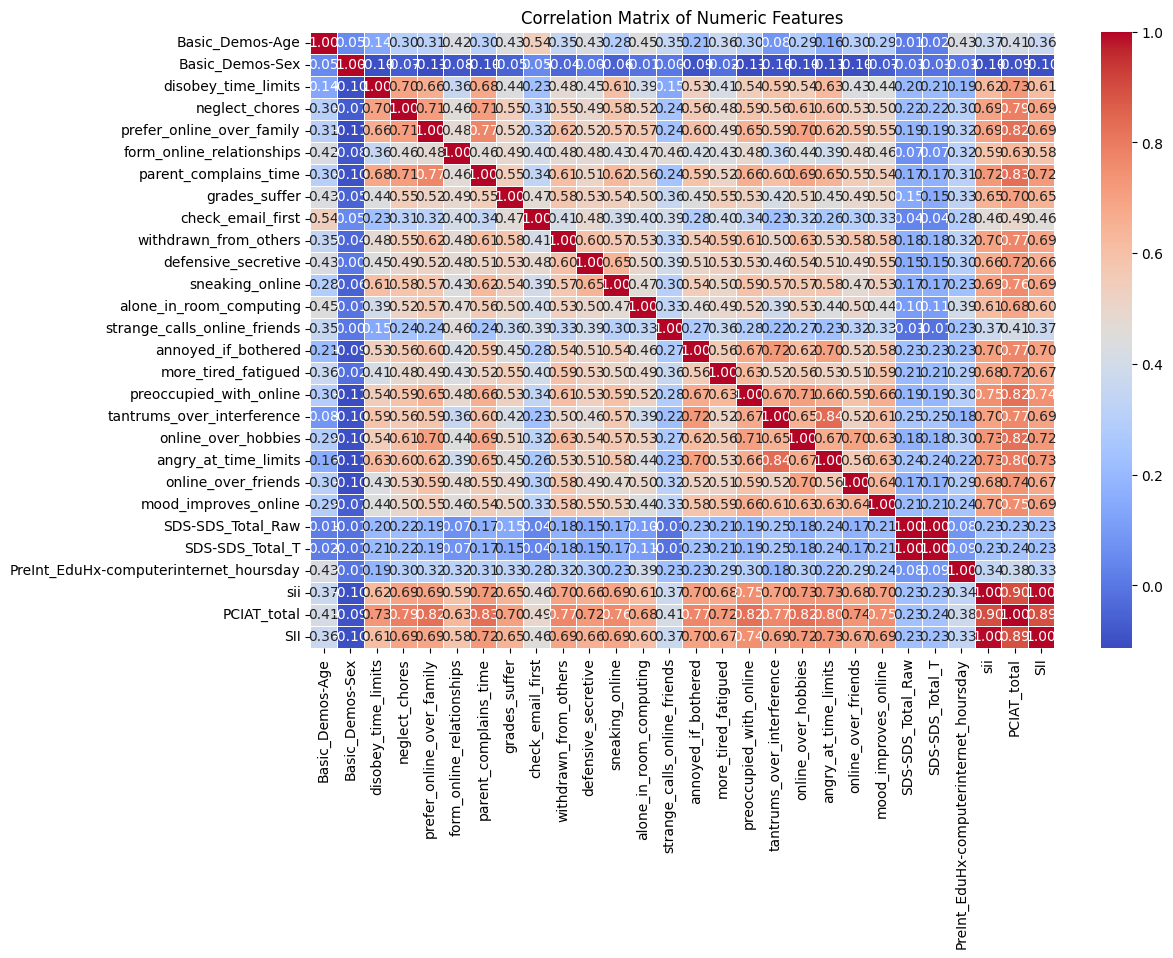

In [61]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Matrix of Numeric Features')

# Display the plot
plt.show()

In [62]:
# Check correlation between 'PreInt_EduHx-computerinternet_hoursday' and other numerical columns
correlations = corr_matrix['PreInt_EduHx-computerinternet_hoursday'].dropna()

# Drop 'PreInt_EduHx-computerinternet_hoursday' itself from the correlation list
correlations = correlations.drop('PreInt_EduHx-computerinternet_hoursday')

# Show the correlations
print("Correlation of 'PreInt_EduHx-computerinternet_hoursday' with other features (excluding itself):")
print(correlations)

# Select the most correlated feature (excluding itself)
most_correlated_feature = correlations.idxmax()  # The most correlated feature with 'PreInt_EduHx-computerinternet_hoursday'
print(f"Most correlated feature: {most_correlated_feature}")

Correlation of 'PreInt_EduHx-computerinternet_hoursday' with other features (excluding itself):
Basic_Demos-Age                 0.425147
Basic_Demos-Sex                -0.006892
disobey_time_limits             0.185500
neglect_chores                  0.302755
prefer_online_over_family       0.315064
form_online_relationships       0.316371
parent_complains_time           0.311938
grades_suffer                   0.326587
check_email_first               0.279266
withdrawn_from_others           0.318876
defensive_secretive             0.297206
sneaking_online                 0.230423
alone_in_room_computing         0.392426
strange_calls_online_friends    0.228451
annoyed_if_bothered             0.225020
more_tired_fatigued             0.287028
preoccupied_with_online         0.298559
tantrums_over_interference      0.179866
online_over_hobbies             0.300746
angry_at_time_limits            0.223436
online_over_friends             0.289726
mood_improves_online            0.244955
SD

In [63]:
# Show the first few records with NaN values
nan_count = train['PreInt_EduHx-computerinternet_hoursday'].isna().sum()
nan_count

82

In [64]:
# Now, perform imputation using Age (we will use median for each Age group)
age_medians = train.groupby('Basic_Demos-Age')['PreInt_EduHx-computerinternet_hoursday'].median()

# Function to impute missing values based on Age
def impute_based_on_age(row):
    if pd.isnull(row['PreInt_EduHx-computerinternet_hoursday']):
        return age_medians.get(row['Basic_Demos-Age'], row['PreInt_EduHx-computerinternet_hoursday'])
    else:
        return row['PreInt_EduHx-computerinternet_hoursday']

# Apply the imputation function
train['PreInt_EduHx-computerinternet_hoursday'] = train.apply(impute_based_on_age, axis=1)

# Check if there are any remaining missing values
remaining_missing = train['PreInt_EduHx-computerinternet_hoursday'].isnull().sum()
print(f"Remaining missing values after imputation: {remaining_missing}")

Remaining missing values after imputation: 0


In [65]:
train.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,check_email_first,...,online_over_friends,mood_improves_online,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII,age_group
0,00008ff9,5,0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,...,2.0,4.0,NaN,NaN,NaN,3.0,2.0,55.0,2,Child
1,000fd460,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Fall,46.0,64.0,0.0,0.0,0.0,0,Early Teen
2,00105258,10,1,5.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,Fall,38.0,54.0,2.0,0.0,28.0,0,Early Teen
3,00115b9f,9,0,4.0,2.0,4.0,0.0,5.0,1.0,0.0,...,4.0,1.0,Summer,31.0,45.0,0.0,1.0,44.0,1,Early Teen
4,001f3379,13,1,3.0,3.0,3.0,0.0,2.0,1.0,0.0,...,2.0,1.0,Summer,40.0,56.0,0.0,1.0,34.0,1,Teen


In [66]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

# # 1. Encode the 'PreInt_EduHx-computerinternet_hoursday' feature into numeric values
# def encode_internet_usage(df):
#     label_encoder = LabelEncoder()
#     df['internet_use_encoded'] = label_encoder.fit_transform(df['PreInt_EduHx-computerinternet_hoursday'])
#     return df

# # 2. Preprocess the dataset and prepare for visualization and model training
# def preprocess_and_visualize(df):
#     # Step 1: Encode the internet usage feature
#     df_encoded = encode_internet_usage(df)
    
#     # Step 2: Create additional features if necessary (e.g., Age Group)
#     df_encoded['Age Group'] = pd.cut(df_encoded['Basic_Demos-Age'], bins=[5, 12, 15, 18, 22, 65],
#                                      labels=['Child', 'Early Teen', 'Teen', 'Young Adult', 'Adult'])

#     # Step 3: Visualizations
#     fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#     # Distribution of internet usage hours (encoded)
#     ax1 = sns.countplot(x='internet_use_encoded', data=df_encoded, palette="Set3", ax=axes[0])
#     axes[0].set_title('Distribution of Hours of Internet Use')
#     axes[0].set_xlabel('Hours per Day Group')
#     axes[0].set_ylabel('Count')

#     total = len(df_encoded['internet_use_encoded'])
#     for p in ax1.patches:
#         count = int(p.get_height())
#         percentage = '{:.1f}%'.format(100 * count / total)
#         ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
#                      textcoords='offset points')

#     # Hours of Internet Use by Age
#     sns.boxplot(y=df_encoded['Basic_Demos-Age'], x=df_encoded['internet_use_encoded'], ax=axes[1], palette="Set3")
#     axes[1].set_title('Hours of Internet Use by Age')
#     axes[1].set_ylabel('Age')
#     axes[1].set_xlabel('Hours per Day Group')

#     # Hours of Internet Use (numeric) by Age Group
#     sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', data=df_encoded, ax=axes[2], palette="Set3")
#     axes[2].set_title('Internet Hours by Age Group')
#     axes[2].set_ylabel('Hours per Day (Numeric)')
#     axes[2].set_xlabel('Age Group')

#     plt.tight_layout()
#     plt.show()

#     return df_encoded

# # Example usage: Apply the full preprocessing and visualization pipeline
# train_processed = preprocess_and_visualize(train)

# # Check the processed DataFrame for further analysis
# print(train_processed.head())


In [67]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from scipy import stats

# # 1. Exploratory Data Analysis (EDA) for 'PreInt_EduHx-computerinternet_hoursday'
# def eda_computer_internet_usage(df):
#     # Check the distribution of the 'PreInt_EduHx-computerinternet_hoursday'
#     print("Value counts for 'PreInt_EduHx-computerinternet_hoursday':")
#     print(df['PreInt_EduHx-computerinternet_hoursday'].value_counts())
    
#     # Visualizing the distribution of the feature
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x='PreInt_EduHx-computerinternet_hoursday', data=df)
#     plt.title('Distribution of Hours of Using Computer/Internet per Day')
#     plt.xlabel('Hours of Usage per Day')
#     plt.ylabel('Frequency')
#     plt.show()
    
#     # Check the correlation of this feature with the target variable 'sii'
#     print("\nCorrelation with 'sii':")
#     correlation = df[['PreInt_EduHx-computerinternet_hoursday', 'sii']].corr()
#     print(correlation)

#     # Checking for missing values
#     print("\nMissing values in the dataset:")
#     print(df['PreInt_EduHx-computerinternet_hoursday'].isnull().sum())

# # 2. Data Cleaning for 'PreInt_EduHx-computerinternet_hoursday'
# def clean_computer_internet_usage(df):
#     # Handle missing values by filling with the mode (since it's categorical data)
#     df['PreInt_EduHx-computerinternet_hoursday'].fillna(df['PreInt_EduHx-computerinternet_hoursday'].mode()[0], inplace=True)
    
#     # Ensure the values are within the expected range (0, 1, 2, 3)
#     valid_values = [0, 1, 2, 3]
#     df = df[df['PreInt_EduHx-computerinternet_hoursday'].isin(valid_values)]
    
#     return df

# # 3. Data Preprocessing for 'PreInt_EduHx-computerinternet_hoursday'
# def preprocess_computer_internet_usage(df):
#     # Convert the categorical feature 'PreInt_EduHx-computerinternet_hoursday' into numerical values if needed
#     # Option 1: Label encoding (0=Less than 1h/day, 1=Around 1h/day, 2=Around 2hs/day, 3=More than 3hs/day)
#     label_encoder = LabelEncoder()
#     df['PreInt_EduHx-computerinternet_hoursday_encoded'] = label_encoder.fit_transform(df['PreInt_EduHx-computerinternet_hoursday'])
    
#     # Option 2: One-hot encoding, if needed
#     # df = pd.get_dummies(df, columns=['PreInt_EduHx-computerinternet_hoursday'], drop_first=True)
    
#     return df

# # 4. Putting it all together: Full EDA, Cleaning, and Preprocessing
# def full_process(df):
#     # Perform EDA
#     eda_computer_internet_usage(df)
#     return df
#     # # Clean the feature (handle missing values and remove outliers)
#     # df_cleaned = clean_computer_internet_usage(df)
    
#     # # Preprocess the feature (encode the categorical feature)
#     # df_processed = preprocess_computer_internet_usage(df_cleaned)
    
#     # # Check the cleaned and processed data
#     # print("\nProcessed DataFrame:")
#     # print(df_processed.head())

#     # return df_processed

# # Example: Apply the full processing pipeline to the data
# train_processed = full_process(train)



In [68]:
train.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,check_email_first,...,online_over_friends,mood_improves_online,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII,age_group
0,00008ff9,5,0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,...,2.0,4.0,NaN,NaN,NaN,3.0,2.0,55.0,2,Child
1,000fd460,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Fall,46.0,64.0,0.0,0.0,0.0,0,Early Teen
2,00105258,10,1,5.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,Fall,38.0,54.0,2.0,0.0,28.0,0,Early Teen
3,00115b9f,9,0,4.0,2.0,4.0,0.0,5.0,1.0,0.0,...,4.0,1.0,Summer,31.0,45.0,0.0,1.0,44.0,1,Early Teen
4,001f3379,13,1,3.0,3.0,3.0,0.0,2.0,1.0,0.0,...,2.0,1.0,Summer,40.0,56.0,0.0,1.0,34.0,1,Teen


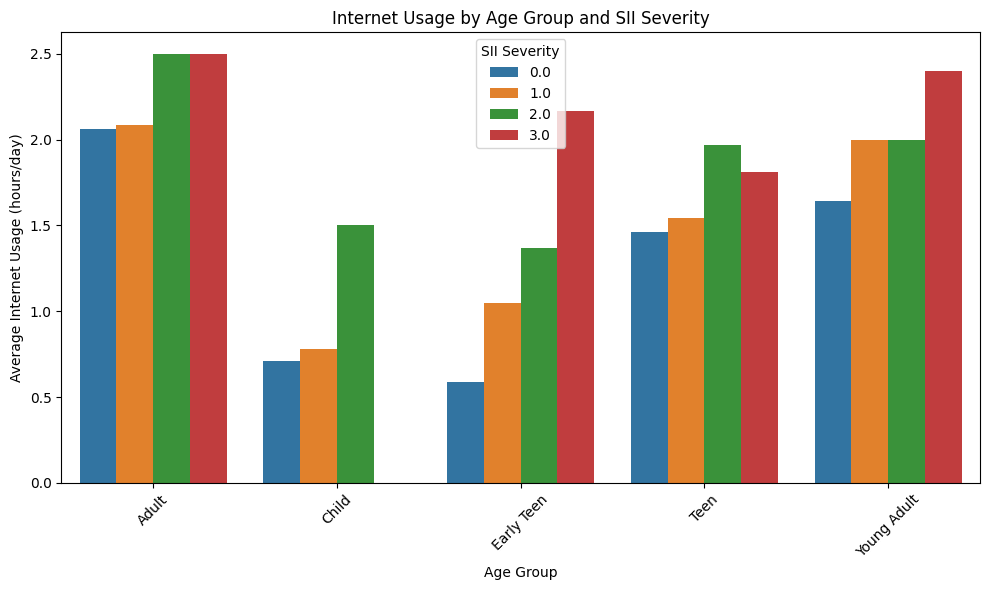

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by age group and sii, and calculate the mean of internet usage (PreInt_EduHx-computerinternet_hoursday)
grouped_data = train.groupby(['age_group', 'sii'])['PreInt_EduHx-computerinternet_hoursday'].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='PreInt_EduHx-computerinternet_hoursday', hue='sii', data=grouped_data)

# Set plot labels and title
plt.title('Internet Usage by Age Group and SII Severity')
plt.xlabel('Age Group')
plt.ylabel('Average Internet Usage (hours/day)')
plt.legend(title='SII Severity')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now we will focus on remaining three fields as part of this notebook EDA

In [70]:
# Check for null values in the specified columns
eda_columns = ['SDS-Season', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

# Count the number of null values in each column
null_values = train[eda_columns].isna().sum()
print("Number of Null values in each column:")
print(null_values)


Number of Null values in each column:
SDS-Season           208
SDS-SDS_Total_Raw    208
SDS-SDS_Total_T      210
dtype: int64


In [71]:
eda_columns = ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [72]:
# Descriptive statistics for the specified columns
descriptive_stats = train[eda_columns].describe()
print("\nDescriptive Statistics for each column:")
print(descriptive_stats)



Descriptive Statistics for each column:
       SDS-SDS_Total_Raw  SDS-SDS_Total_T
count        2526.000000      2524.000000
mean           40.976643        57.645800
std            10.233233        13.045111
min            17.000000        38.000000
25%            33.000000        47.000000
50%            39.000000        55.000000
75%            46.000000        64.000000
max            96.000000       100.000000


In [73]:
# Select only numeric columns for correlation
numeric_columns = train.select_dtypes(include=['number']).columns

# Calculate correlation for the three SDS columns with other numeric columns
correlation_matrix = train[eda_columns + list(numeric_columns)].corr()

# Filter the correlation matrix for the three SDS columns
sds_correlation = correlation_matrix[eda_columns]
print("\nCorrelation of SDS columns with other features:")
print(sds_correlation)



Correlation of SDS columns with other features:
                                        SDS-SDS_Total_Raw  SDS-SDS_Total_Raw  \
SDS-SDS_Total_Raw                                1.000000           1.000000   
SDS-SDS_Total_T                                  0.997495           0.997495   
Basic_Demos-Age                                  0.013947           0.013947   
Basic_Demos-Sex                                 -0.012997          -0.012997   
disobey_time_limits                              0.203631           0.203631   
neglect_chores                                   0.216438           0.216438   
prefer_online_over_family                        0.190846           0.190846   
form_online_relationships                        0.068788           0.068788   
parent_complains_time                            0.169958           0.169958   
grades_suffer                                    0.146983           0.146983   
check_email_first                                0.037066           0.0

In [74]:
# Correlation with the target variable (SII)
target_variable = 'sii'  # Replace with the actual target variable name
sii_correlation = train[eda_columns + [target_variable]].corr()[target_variable]
print("\nCorrelation of SDS columns with SII:")
print(sii_correlation)



Correlation of SDS columns with SII:
SDS-SDS_Total_Raw    0.229810
SDS-SDS_Total_T      0.233113
sii                  1.000000
Name: sii, dtype: float64


SDS-SDS_Total_T has a slightly higher correlation than SDS-SDS_Total_Raw, which might indicate that the T-Score could be a better predictor of sii.

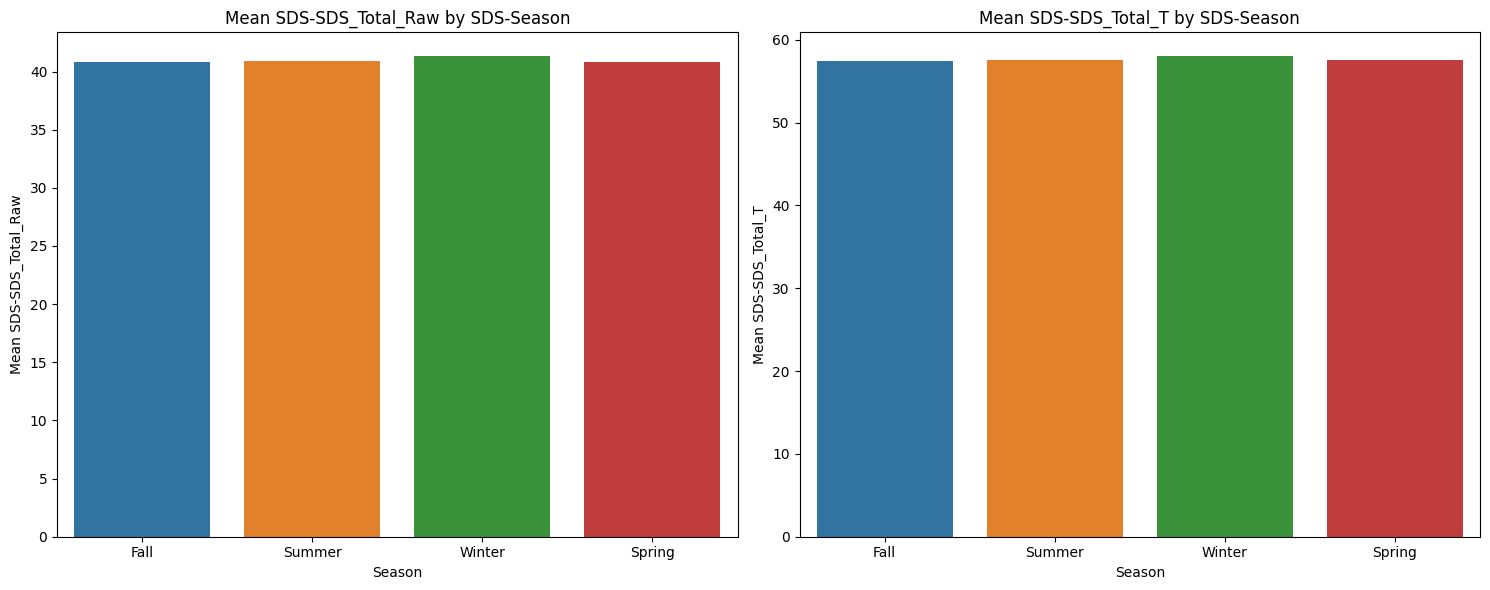

In [75]:
# Plotting bar plots for mean SDS-SDS_Total_Raw and SDS-SDS_Total_T by SDS-Season
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for mean SDS-SDS_Total_Raw by SDS-Season
sns.barplot(data=train, x='SDS-Season', y='SDS-SDS_Total_Raw', ax=axes[0], estimator='mean', ci=None)
axes[0].set_title('Mean SDS-SDS_Total_Raw by SDS-Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Mean SDS-SDS_Total_Raw')

# Bar plot for mean SDS-SDS_Total_T by SDS-Season
sns.barplot(data=train, x='SDS-Season', y='SDS-SDS_Total_T', ax=axes[1], estimator='mean', ci=None)
axes[1].set_title('Mean SDS-SDS_Total_T by SDS-Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Mean SDS-SDS_Total_T')

# Show the plots
plt.tight_layout()
plt.show()


it is same for all the seasons

In [76]:
# Drop the 'SDS-Season' column from the dataset
train = train.drop(columns=['SDS-Season'])


In [77]:
train.head()

,id,Basic_Demos-Age,Basic_Demos-Sex,disobey_time_limits,neglect_chores,prefer_online_over_family,form_online_relationships,parent_complains_time,grades_suffer,check_email_first,...,angry_at_time_limits,online_over_friends,mood_improves_online,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,PCIAT_total,SII,age_group
0,00008ff9,5,0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,...,4.0,2.0,4.0,NaN,NaN,3.0,2.0,55.0,2,Child
1,000fd460,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,46.0,64.0,0.0,0.0,0.0,0,Early Teen
2,00105258,10,1,5.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,1.0,1.0,38.0,54.0,2.0,0.0,28.0,0,Early Teen
3,00115b9f,9,0,4.0,2.0,4.0,0.0,5.0,1.0,0.0,...,3.0,4.0,1.0,31.0,45.0,0.0,1.0,44.0,1,Early Teen
4,001f3379,13,1,3.0,3.0,3.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,40.0,56.0,0.0,1.0,34.0,1,Teen


In [78]:
train.shape

(2734, 30)

In [79]:
# Check for rows where 'SDS-SDS_Total_T' is null but 'SDS-SDS_Total_Raw' is not
mask = train['SDS-SDS_Total_T'].isna() & train['SDS-SDS_Total_Raw'].notna()

# Count the number of such rows
num_null_in_T_not_in_Raw = mask.sum()

print(f"Number of rows where 'SDS-SDS_Total_T' is null but 'SDS-SDS_Total_Raw' is not: {num_null_in_T_not_in_Raw}")


Number of rows where 'SDS-SDS_Total_T' is null but 'SDS-SDS_Total_Raw' is not: 2


In [80]:
# Impute missing values in 'SDS-SDS_Total_T' based on the corresponding 'SDS-SDS_Total_Raw'
train['SDS-SDS_Total_T'] = train['SDS-SDS_Total_T'].fillna(train['SDS-SDS_Total_Raw'])

# Verify if the missing value is imputed
print(train['SDS-SDS_Total_T'].isna().sum())


208


In [81]:
# Drop the 'SDS-Season' column from the dataset
train = train.drop(columns=['SDS-SDS_Total_Raw'])


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns

# Step 2: Calculate correlation of each numeric feature with 'SDS-SDS_Total_T'
correlations = train[numeric_columns].corrwith(train['SDS-SDS_Total_T'])

correlations


Basic_Demos-Age                           0.015484
Basic_Demos-Sex                          -0.013290
disobey_time_limits                       0.207332
neglect_chores                            0.220272
prefer_online_over_family                 0.194066
form_online_relationships                 0.070734
parent_complains_time                     0.172939
grades_suffer                             0.149643
check_email_first                         0.038957
withdrawn_from_others                     0.179491
defensive_secretive                       0.151358
sneaking_online                           0.170498
alone_in_room_computing                   0.105338
strange_calls_online_friends             -0.012949
annoyed_if_bothered                       0.230968
more_tired_fatigued                       0.210846
preoccupied_with_online                   0.192810
tantrums_over_interference                0.253017
online_over_hobbies                       0.181087
angry_at_time_limits           

In [83]:
# Step 3: Set a correlation threshold (e.g., 0.4) for feature selection
threshold = 0.2
selected_features = correlations[correlations.abs() > threshold].index

# Step 4: Display the selected features based on correlation with 'SDS-SDS_Total_T'
print("Selected Features based on correlation with 'SDS-SDS_Total_T':")
print(selected_features)


Selected Features based on correlation with 'SDS-SDS_Total_T':
Index(['disobey_time_limits', 'neglect_chores', 'annoyed_if_bothered',
       'more_tired_fatigued', 'tantrums_over_interference',
       'angry_at_time_limits', 'mood_improves_online', 'SDS-SDS_Total_T',
       'sii', 'PCIAT_total', 'SII'],
      dtype='object')


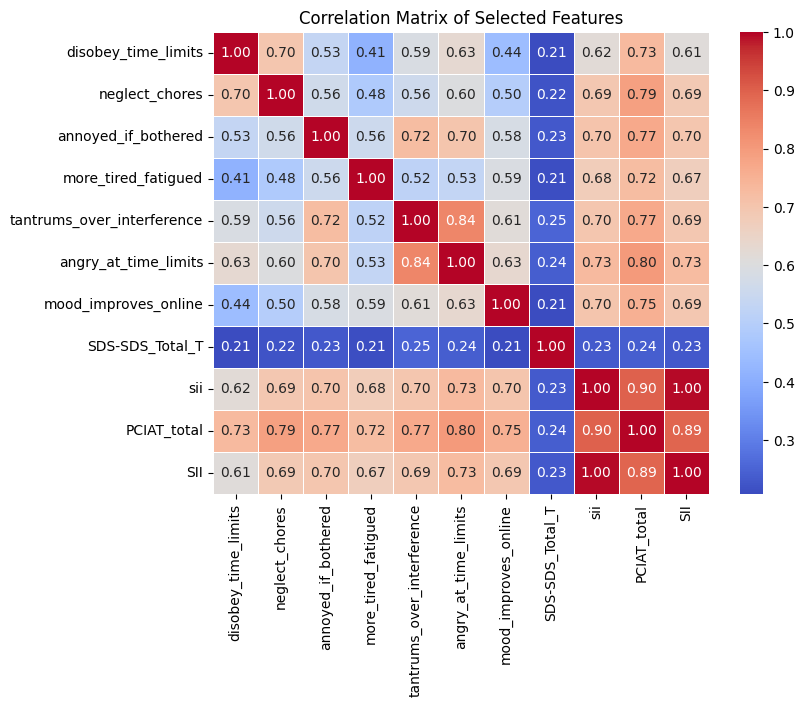

In [84]:
# Step 5: Create a correlation matrix for the selected features
selected_features_matrix = train[selected_features].corr()

# Step 6: Visualize the correlation matrix of the selected features
plt.figure(figsize=(8, 6))
sns.heatmap(selected_features_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

Missing values in 'SDS-SDS_Total_T' after KNN imputation: 0


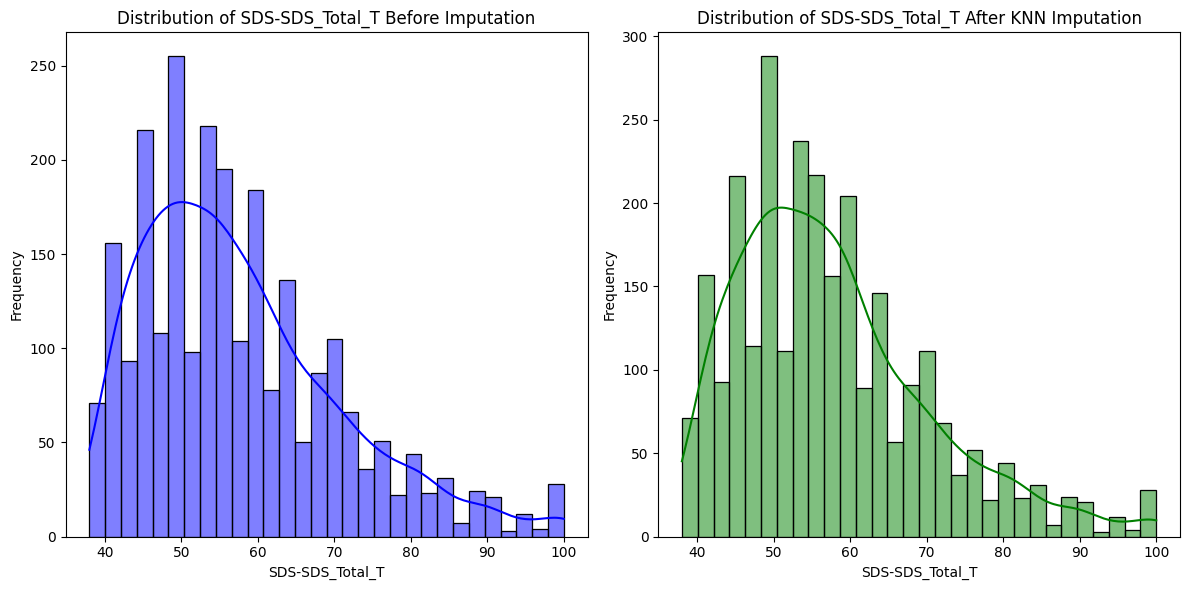

         id  Basic_Demos-Age  Basic_Demos-Sex  disobey_time_limits  \
0  00008ff9                5                0                  5.0   
1  000fd460                9                0                  0.0   
2  00105258               10                1                  5.0   
3  00115b9f                9                0                  4.0   
4  001f3379               13                1                  3.0   

   neglect_chores  prefer_online_over_family  form_online_relationships  \
0             4.0                        4.0                        0.0   
1             0.0                        0.0                        0.0   
2             2.0                        2.0                        1.0   
3             2.0                        4.0                        0.0   
4             3.0                        3.0                        0.0   

   parent_complains_time  grades_suffer  check_email_first  ...  \
0                    4.0            0.0                0.0  .

In [85]:
from sklearn.impute import KNNImputer
# Step 5: Apply KNN imputation to fill the missing values in 'SDS-SDS_Total_T'
knn_imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the selected features (including 'SDS-SDS_Total_T')
train_imputed = train.copy()
train_imputed[selected_features] = knn_imputer.fit_transform(train[selected_features])

# Step 6: Check how many missing values remain in 'SDS-SDS_Total_T' after imputation
print(f"Missing values in 'SDS-SDS_Total_T' after KNN imputation: {train_imputed['SDS-SDS_Total_T'].isnull().sum()}")

# Visualize the distribution of 'SDS-SDS_Total_T' before and after imputation
plt.figure(figsize=(12, 6))

# Before imputation
plt.subplot(1, 2, 1)
sns.histplot(train['SDS-SDS_Total_T'], kde=True, color='blue', bins=30)
plt.title('Distribution of SDS-SDS_Total_T Before Imputation')
plt.xlabel('SDS-SDS_Total_T')
plt.ylabel('Frequency')

# After imputation
plt.subplot(1, 2, 2)
sns.histplot(train_imputed['SDS-SDS_Total_T'], kde=True, color='green', bins=30)
plt.title('Distribution of SDS-SDS_Total_T After KNN Imputation')
plt.xlabel('SDS-SDS_Total_T')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Optional: Display a preview of the imputed data
print(train_imputed.head())

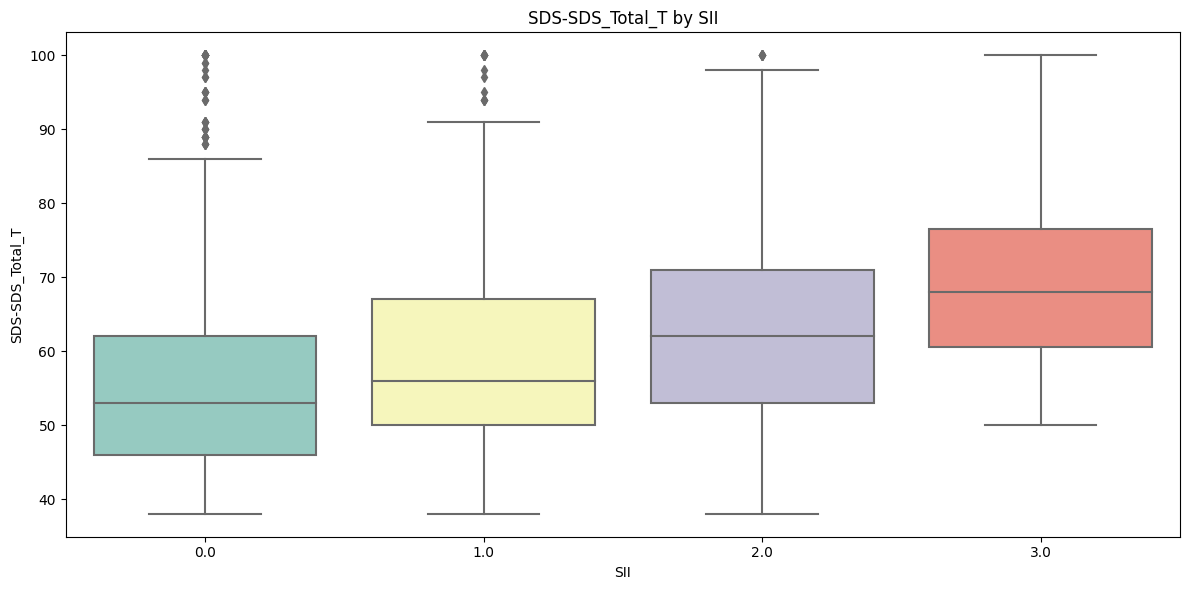

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values for simplicity
df = train[['SDS-SDS_Total_T', 'sii']]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sii', y='SDS-SDS_Total_T', palette='Set3')
plt.title('SDS-SDS_Total_T by SII')
plt.xlabel('SII')
plt.ylabel('SDS-SDS_Total_T')

plt.tight_layout()
plt.show()


In [87]:
# Step 1: Check for missing values (NaN) in the final dataset after imputation
missing_values = train_imputed.isnull().sum()

# Step 2: Display columns that have missing values
print("Missing values in each column of the final dataset after imputation:")
print(missing_values[missing_values == 0])


Missing values in each column of the final dataset after imputation:
id                                        0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
disobey_time_limits                       0
neglect_chores                            0
prefer_online_over_family                 0
form_online_relationships                 0
parent_complains_time                     0
grades_suffer                             0
check_email_first                         0
withdrawn_from_others                     0
defensive_secretive                       0
sneaking_online                           0
alone_in_room_computing                   0
strange_calls_online_friends              0
annoyed_if_bothered                       0
more_tired_fatigued                       0
preoccupied_with_online                   0
tantrums_over_interference                0
online_over_hobbies                       0
angry_at_time_limits                      0
online_